# COVID-19 India -- Data Visualization

## Data

The data used here is obtained from the Kaggle dataset https://www.kaggle.com/sudalairajkumar/covid19-in-india . You can download it from this website and use it in your project. 

# Data Visualization

## Importing necessary packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/covid19-in-india/ICMRTestingDetails.csv


In [2]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading the dataset

In [3]:
df_complete=pd.read_csv("../input/covid19-in-india/covid_19_india.csv")

In [4]:
df_complete.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [9]:
df_complete.dropna(axis=0)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1666,1667,06/05/20,8:00 AM,Telengana,-,-,585,29,1096
1667,1668,06/05/20,8:00 AM,Tripura,-,-,2,0,43
1668,1669,06/05/20,8:00 AM,Uttarakhand,-,-,39,1,61
1669,1670,06/05/20,8:00 AM,Uttar Pradesh,-,-,987,56,2880


In [10]:
df_selective=pd.DataFrame(df_complete, columns= ['State/UnionTerritory','Confirmed'])

In [11]:
df_selective.head()

,State/UnionTerritory,Confirmed
0,Kerala,1
1,Kerala,1
2,Kerala,2
3,Kerala,3
4,Kerala,3


### Visualization of confirmed cases in India with respect to States/UnionTerritory in bar graph

In [12]:
df_confirmed=df_selective.groupby('State/UnionTerritory',as_index=False)['Confirmed'].sum()

In [13]:
df_confirmed.head()

,State/UnionTerritory,Confirmed
0,Andaman and Nicobar Islands,719
1,Andhra Pradesh,27869
2,Arunachal Pradesh,34
3,Assam,1158
4,Bihar,6571


In [14]:
df_confirmed

,State/UnionTerritory,Confirmed
0,Andaman and Nicobar Islands,719
1,Andhra Pradesh,27869
2,Arunachal Pradesh,34
3,Assam,1158
4,Bihar,6571
5,Chandigarh,1359
6,Chhattisgarh,1124
7,Dadar Nagar Haveli,1
8,Delhi,73099
9,Goa,271


Text(0, 0.5, 'Confirmed Cases Count')

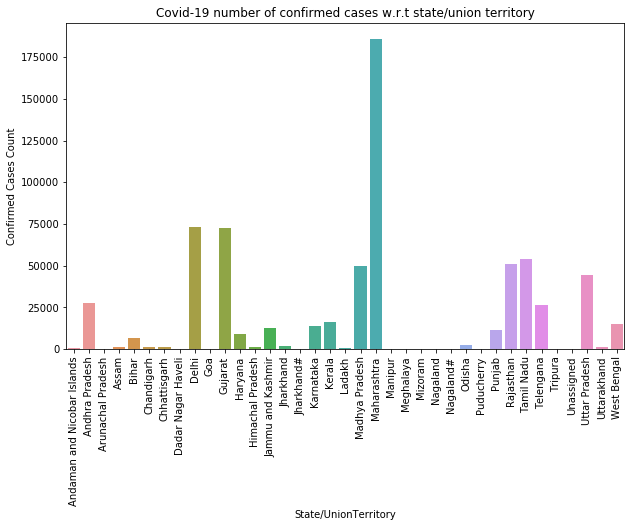

In [15]:
plt.figure(figsize=(10,6))
# title
plt.title("Covid-19 number of confirmed cases w.r.t state/union territory")
# Bar chart
sns.barplot(x=df_confirmed['State/UnionTerritory'], y=df_confirmed['Confirmed'])
plt.xticks(rotation=90)
plt.ylabel("Confirmed Cases Count")

### Visualization of cured cases in India with respect to States/UnionTerritory in bar graph

In [16]:
df_cured=df_complete.groupby('State/UnionTerritory',as_index=False)['Cured'].sum()

In [17]:
df_cured

,State/UnionTerritory,Cured
0,Andaman and Nicobar Islands,356
1,Andhra Pradesh,5328
2,Arunachal Pradesh,16
3,Assam,461
4,Bihar,1490
5,Chandigarh,380
6,Chhattisgarh,741
7,Dadar Nagar Haveli,0
8,Delhi,16908
9,Goa,164


Text(0, 0.5, 'Cured Cases Count')

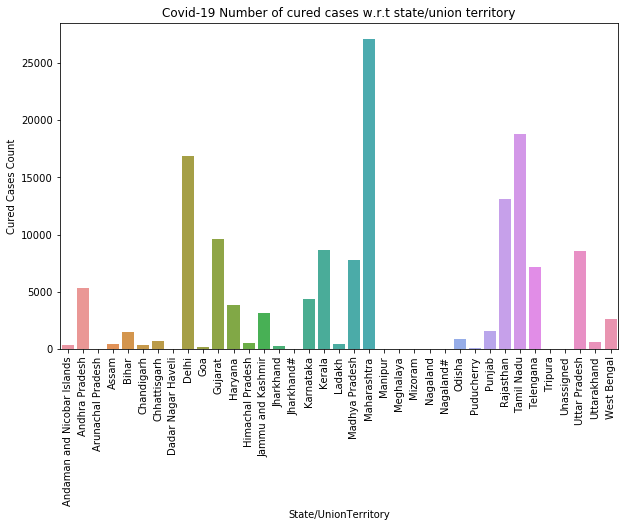

In [18]:
plt.figure(figsize=(10,6))
# title
plt.title("Covid-19 Number of cured cases w.r.t state/union territory")
# Bar chart
sns.barplot(x=df_cured['State/UnionTerritory'], y=df_cured['Cured'])
plt.xticks(rotation=90)
plt.ylabel("Cured Cases Count")

### Visualization of death cases in India with respect to States/UnionTerritory in bar graph

In [19]:
df_death=df_complete.groupby('State/UnionTerritory',as_index=False)['Deaths'].sum()

In [20]:
df_death

,State/UnionTerritory,Deaths
0,Andaman and Nicobar Islands,0
1,Andhra Pradesh,634
2,Arunachal Pradesh,0
3,Assam,26
4,Bihar,74
5,Chandigarh,2
6,Chhattisgarh,0
7,Dadar Nagar Haveli,0
8,Delhi,1297
9,Goa,0


Text(0, 0.5, 'Number of deaths')

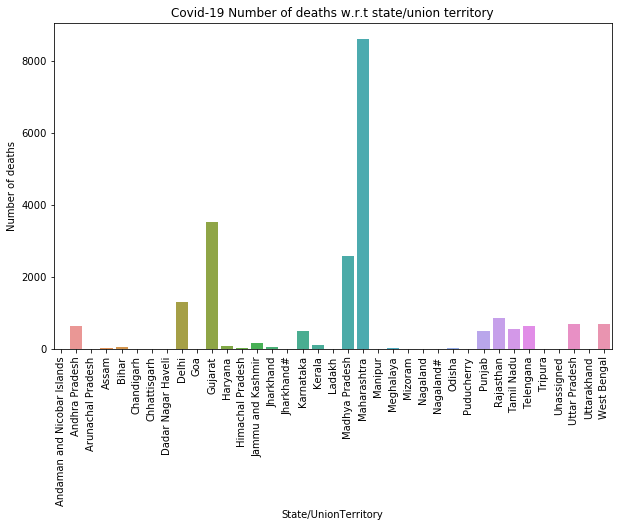

In [21]:
plt.figure(figsize=(10,6))
# title
plt.title("Covid-19 Number of deaths w.r.t state/union territory")
# Bar chart
sns.barplot(x=df_death['State/UnionTerritory'], y=df_death['Deaths'])
plt.xticks(rotation=90)
plt.ylabel("Number of deaths")

# Conclusion

This analysis is done to represent the number of confirmed COVID19 cases in India with respect to the states and Union Territories. It also represents the number of cured cases in each state and the number of deaths in each state.

From this visualization, it can be easily found which state has the highest death rate, confirmed cases rate and cure rate. For now, it is clearly seen that Maharashtra has the highest number of confirmed cases. It has the highest number of cured cases but also the highest number of deaths.

## Thank you :)